In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('LA_listings.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,75212,Sunny Room only in town house nr Long Beach…,343761,Kris,Other Cities,Lakewood,33.846500,-118.082440,Private room,65.0,2,77,2025-01-12,0.46,1,330,7,NaN
1,76561,420 Friendly Sweet Lil' Guesthouse by Sofi & LAX,403838,Jennifer,Unincorporated Areas,View Park-Windsor Hills,33.985220,-118.359420,Entire home/apt,109.0,2,902,2025-02-16,5.30,4,136,60,NaN
2,79502,Silver Lake million dollar view * luxe patio,428171,H.,City of Los Angeles,Silver Lake,34.082859,-118.278755,Entire home/apt,106.0,30,300,2024-10-10,1.78,2,360,2,NaN
3,79832,Guest Quarters @ the Hollywood Sign,28569,Robert,City of Los Angeles,Hollywood Hills,34.128010,-118.319190,Entire home/apt,110.0,30,483,2021-01-18,2.84,1,60,0,HSR19-002716
4,80714,Cozy secluded Guesthouse in Garden,436647,Cari,City of Los Angeles,Mid-Wilshire,34.057980,-118.355410,Entire home/apt,109.0,30,197,2024-12-17,1.16,1,337,5,HSR19-003488


In [3]:
df.isnull()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45026,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True
45027,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True
45028,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True
45029,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45031 entries, 0 to 45030
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              45031 non-null  int64  
 1   name                            45030 non-null  object 
 2   host_id                         45031 non-null  int64  
 3   host_name                       44961 non-null  object 
 4   neighbourhood_group             45031 non-null  object 
 5   neighbourhood                   45031 non-null  object 
 6   latitude                        45031 non-null  float64
 7   longitude                       45031 non-null  float64
 8   room_type                       45031 non-null  object 
 9   price                           35867 non-null  float64
 10  minimum_nights                  45031 non-null  int64  
 11  number_of_reviews               45031 non-null  int64  
 12  last_review                     

In [5]:
missing_info = df.isnull().sum()
missing_info = missing_info[missing_info > 0].sort_values(ascending=False)
print(missing_info)

license              32296
last_review          12648
reviews_per_month    12648
price                 9164
host_name               70
name                     1
dtype: int64


In [6]:
df.shape

(45031, 18)

## Cleaning the data

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df_non_null = df.dropna()
df_non_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8939 entries, 3 to 44774
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              8939 non-null   int64  
 1   name                            8939 non-null   object 
 2   host_id                         8939 non-null   int64  
 3   host_name                       8939 non-null   object 
 4   neighbourhood_group             8939 non-null   object 
 5   neighbourhood                   8939 non-null   object 
 6   latitude                        8939 non-null   float64
 7   longitude                       8939 non-null   float64
 8   room_type                       8939 non-null   object 
 9   price                           8939 non-null   float64
 10  minimum_nights                  8939 non-null   int64  
 11  number_of_reviews               8939 non-null   int64  
 12  last_review                     8939 n

## Visualizing the Data

C:\Users\KAPISH\AppData\Local\Temp\ipykernel_22744\4045118015.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(filtered_df['price'], color='r')


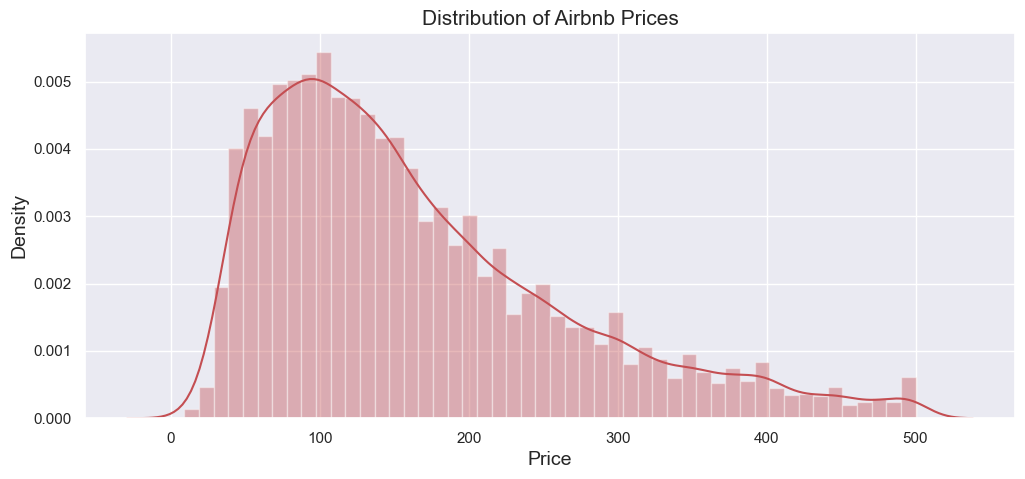

In [44]:
plt.figure(figsize=(12, 5))
sns.set_theme(style='darkgrid')
filtered_df = df[df['price'] <= 500]
sns.distplot(filtered_df['price'], color='r')
plt.xlabel('Price', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Distribution of Airbnb Prices', fontsize=15)
plt.show()

## Finding Total count of different types of rooms

In [9]:
airbnb_room_types = df['room_type'].unique()
airbnb_room_types

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

In [11]:
## most listed room type
airbnb_room_types_frequency = dict(df['room_type'].value_counts())
airbnb_room_types_frequency

{'Entire home/apt': np.int64(32954),
 'Private room': np.int64(11444),
 'Hotel room': np.int64(331),
 'Shared room': np.int64(302)}

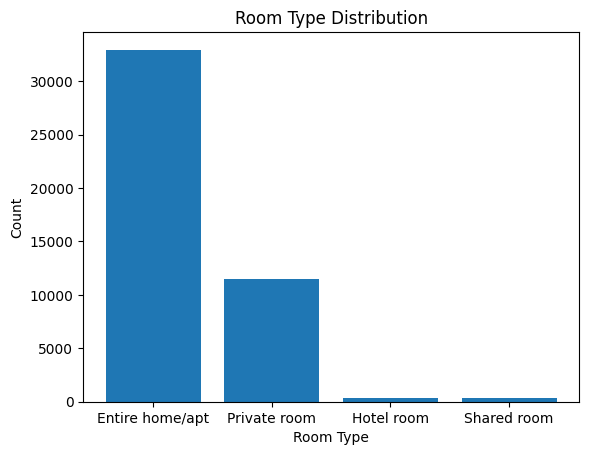

In [12]:
plt.bar(airbnb_room_types_frequency.keys(), airbnb_room_types_frequency.values())
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

## Finding relation between neighbourhood group and avaiability of rooms

C:\Users\KAPISH\AppData\Local\Temp\ipykernel_22744\2499867524.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='neighbourhood_group', y='availability_365', palette='plasma')
C:\Users\KAPISH\AppData\Local\Temp\ipykernel_22744\2499867524.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), size='12')


[Text(0, 0, 'Other Cities'),
 Text(1, 0, 'Unincorporated Areas'),
 Text(2, 0, 'City of Los Angeles')]

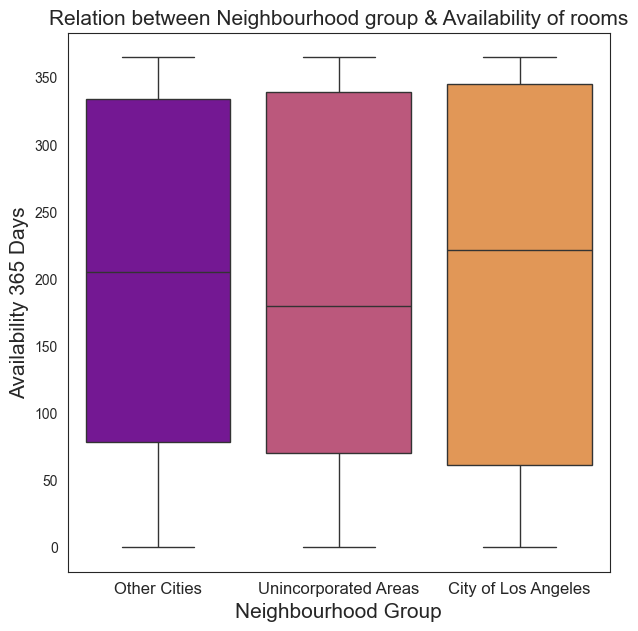

In [13]:
plt.figure(figsize=(7, 7)) 
sns.set_style('white')

ax = sns.boxplot(data=df, x='neighbourhood_group', y='availability_365', palette='plasma')
ax.set_title('Relation between Neighbourhood group & Availability of rooms').set_fontsize('15')
ax.set_ylabel('Availability 365 Days').set_fontsize('15')
ax.set_xlabel('Neighbourhood Group').set_fontsize('15')

ax.set_xticklabels(ax.get_xticklabels(), size='12')


Text(0.5, 1.0, 'Average Price by Neighbourhood Group')

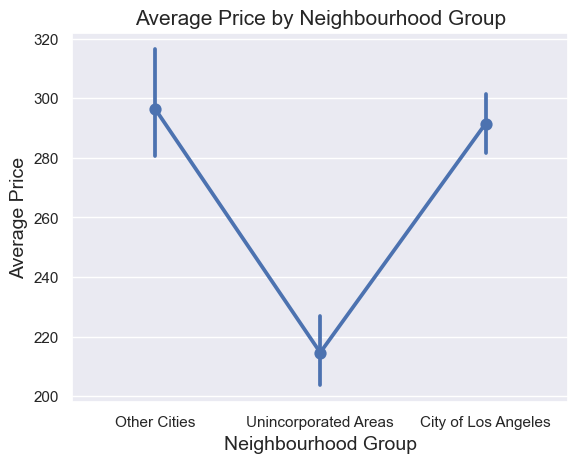

In [47]:
from statistics import mean
sns.pointplot(x = 'neighbourhood_group', y='price', data=df, estimator = np.mean)
plt.xlabel('Neighbourhood Group',fontsize=14)
plt.ylabel('Average Price',fontsize=14)
plt.title('Average Price by Neighbourhood Group',fontsize=15)

## Finding top the listing counts

In [32]:
df_host_count = df['host_id'].value_counts().reset_index()
df_host_count.columns = ['host_id', 'count']
top_hosts = df_host_count.head(10)
top_hosts

,host_id,count
0,107434423,582
1,30850484,155
2,656861752,144
3,446820235,138
4,468914943,132
5,501999278,116
6,271118401,114
7,64165193,113
8,126644161,112
9,668954332,111


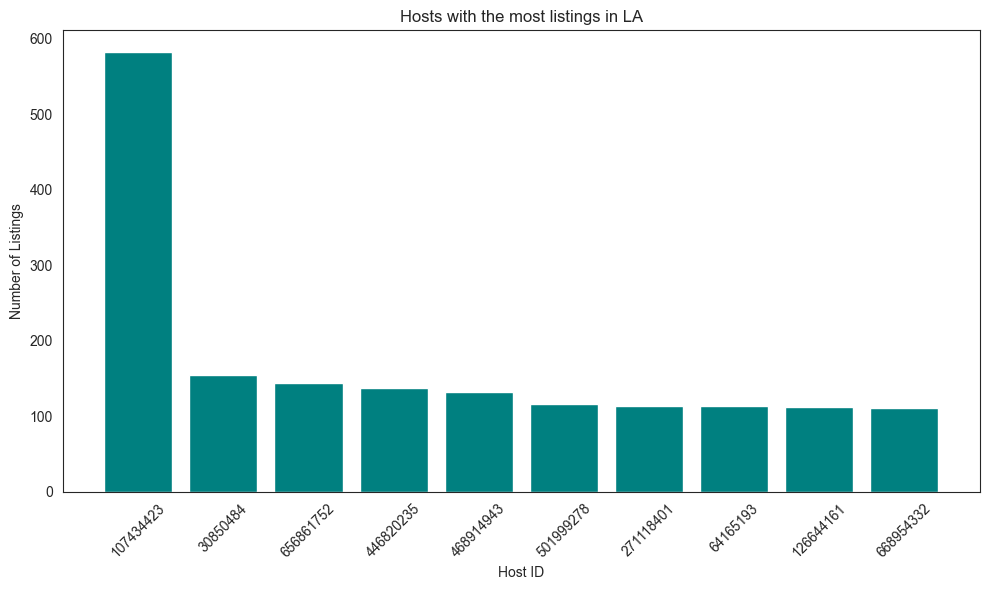

In [34]:
plt.figure(figsize=(10, 6))
plt.bar(top_hosts['host_id'].astype(str), top_hosts['count'], color='teal')
plt.xlabel('Host ID')
plt.ylabel('Number of Listings')
plt.title('Hosts with the most listings in LA')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()